In [1]:
%pylab inline
from scipy import optimize
import pandas as pd

data=pd.read_csv("data.csv", header=None)

Populating the interactive namespace from numpy and matplotlib


### Cargando los datos.

In [2]:
X_data=data[0]
y_data=data[1]

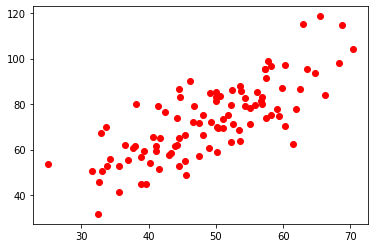

In [3]:
plt.plot(X_data,y_data,"ro")

### Fitting using scipy.optimize

In [4]:
def Linear(x,m,b):
    return m*x+b

guess=[10,10]

params,cov=optimize.curve_fit(Linear,X_data,y_data,guess)

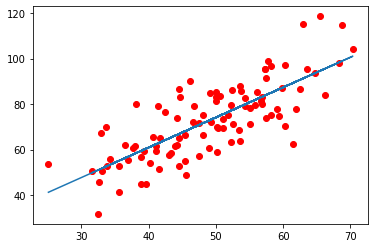

In [5]:
plt.plot(X_data,y_data,"ro")
plt.plot(X_data,Linear(X_data,*params))

### Fitting using Gradient Descent.

In [6]:
#Hypothesis function.
def Hypothesis(θ,X):
    return θ[1]*X+θ[0]

#Error functions: MSE, MAE and MAPE.

def MSE_func(θ,X,Y):
    m=len(Y)
    return 1/(2*m)*np.dot((Hypothesis(θ,X)-Y),(Hypothesis(θ,X)-Y).T)

def MAE_func(θ,X,Y):
    m=len(Y)
    return sum(abs(Hypothesis(θ,X)-Y))

def MAPE_func(θ,X,Y):
    m=len(Y)
    return 100/m*np.dot(abs(Hypothesis(θ,X)-Y),abs(1/Y))


#Jacobian of the error function J.
def dJ(θ,X,Y):
    m=len(Y)
    dJ=1/m*np.array([sum(Hypothesis(θ,X)-Y),np.dot((Hypothesis(θ,X)-Y),X.T)])
    return dJ

In [7]:
θ_guess = [10,10]     # initial values of y=theta_1*x + theta_0  
α = 0.0001            # The learning Rate  

In [8]:
#Implementing Gradient Descent.
def GradientDescent(X,Y,guess,lr,epochs=100):
    
    θ=guess
    
    #Arrays to store error function for each iteration.
    MSE=[]
    MAE=[]
    MAPE=[]
    

    #Updating the θ parameters and error functions according to GD.
    for i in range(epochs):
        θ=θ-lr*dJ(θ,X,Y)
        MSE.append(MSE_func(θ,X,Y))
        MAE.append(MAE_func(θ,X,Y))
        MAPE.append(MAPE_func(θ,X,Y))
    return [θ,MSE,MAE,MAPE]

In [9]:
GD_params,mse0,mae0,mape0=GradientDescent(X_data,y_data,θ_guess,α)

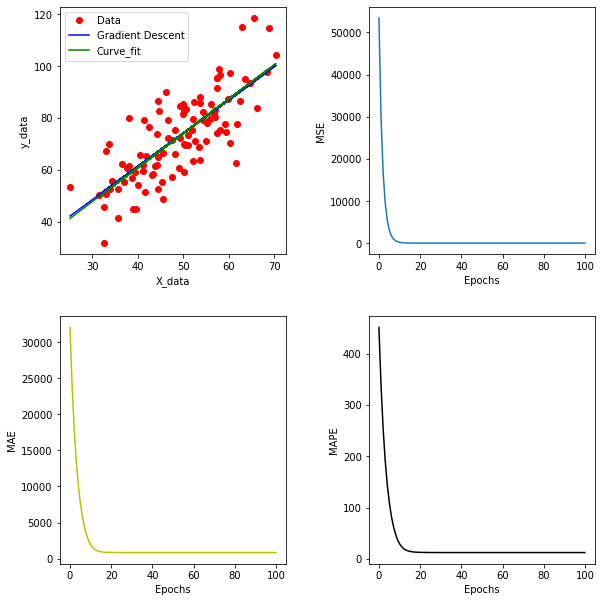

In [10]:
epochs=100
t=np.linspace(0,epochs,num=epochs)

fig,ax=subplots(2,2,figsize=(9,9))

ax[0,0].plot(X_data,y_data,"ro",label="Data")
ax[0,0].plot(X_data,Linear(X_data,*GD_params[::-1]),"b",label="Gradient Descent")
ax[0,0].plot(X_data,Linear(X_data,*params),"g",label="Curve_fit")
ax[0,0].set_xlabel("X_data")
ax[0,0].set_ylabel("y_data")
ax[0,0].legend()

ax[0,1].plot(t,mse0)
ax[0,1].set_xlabel("Epochs")
ax[0,1].set_ylabel("MSE")

ax[1,0].plot(t,mae0,"y")
ax[1,0].set_xlabel("Epochs")
ax[1,0].set_ylabel("MAE")

ax[1,1].plot(t,mape0,"k")
ax[1,1].set_xlabel("Epochs")
ax[1,1].set_ylabel("MAPE")

fig.tight_layout(pad=3)

### Changing the learning rate $\alpha$.

In [11]:
# Array of different values of alpha.
α_vect=np.array([2,3,4,5,6,7])/10000

#COnverting the array into a matrix of 2x3.
α_matx=α_vect.reshape(2,3)

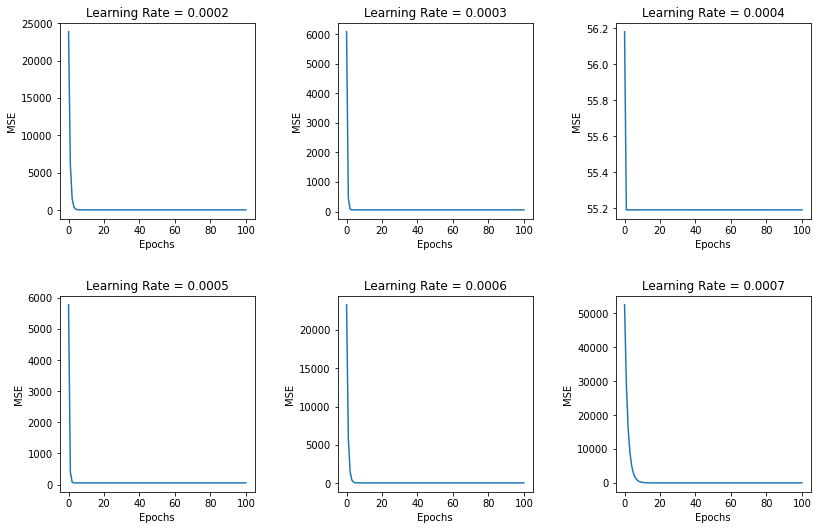

In [12]:
fig2,ax2=subplots(2,3,figsize=(12,8))

for i in range(2):
    for j in range(3):
        labl="Learning Rate = "+str(α_matx[i,j])
        ax2[i,j].plot(t,GradientDescent(X_data,y_data,θ_guess,α_matx[i,j])[1])
        ax2[i,j].set_xlabel("Epochs")
        ax2[i,j].set_ylabel("MSE")
        ax2[i,j].set_title(labl)
        
fig2.tight_layout(pad=3.0)